# 다중 클래스 분류용 선형 모델

많은 선형 분류 모델은 태생적으로 이진 분류만을 지원함

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 방법은 일대다 방법

각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴

결국 클래스의 수만큼 이진 분류 모델이 만들어짐

예측할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

In [6]:
#다중 클래스 분류

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from matplotlib import font_manager, rc

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

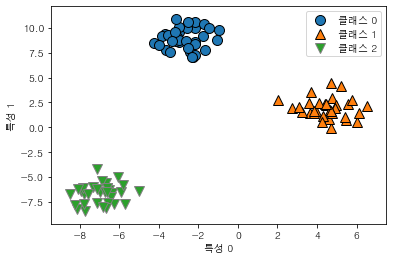

In [10]:
X, y=make_blobs(random_state =42)#특성 2개, 클래스 3개, 샘플 100개
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
# 세 개의 클래스를 가진 2차원 데이터셋

In [11]:
#이 데이터셋으로 Logistic Regression 훈련
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)
#coef_ 배열의 크기는 (3,2)
#coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있음
#열은 각 특성에 따른 계수값을 가지고 있음

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


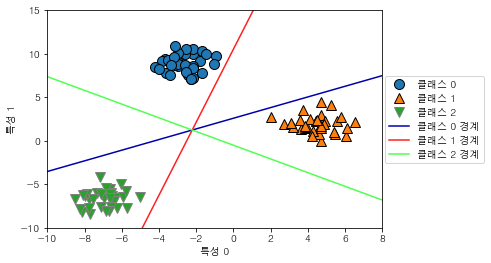

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01, 0.3))
#세 개의 일대다 분류기가 만든 결정경계의 시각화

Text(0, 0.5, '특성 1')

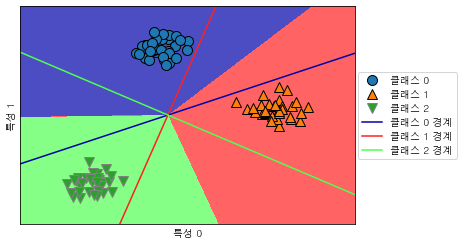

In [15]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_, 
                                 mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
           '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
#2차원 모든 데이터에 대한 예측
#세 개의 일대다 분류기가 만든 다중 클래스 결정 경계의 시각화
#삼각형 내 점들은 가장 가까운 직선의 클래스임

In [20]:
#로지스틱 회귀 붓꽃 테스트
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr = LogisticRegression().fit(X, y)
logr.fit(X_train, y_train)
y_pred=logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(logr.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabled points out of a total %d points: %d (60, 5)


In [21]:
print("predict:\n",logr.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[3.31268621e-04 1.22812782e-01 8.76855949e-01]
 [1.49073655e-02 9.68438212e-01 1.66544225e-02]
 [9.87117165e-01 1.28825421e-02 2.92956826e-07]
 [3.90825442e-06 4.07650401e-02 9.59231052e-01]
 [9.70874163e-01 2.91252303e-02 6.06746466e-07]
 [6.11405883e-06 1.15477255e-02 9.88446160e-01]
 [9.82263653e-01 1.77360426e-02 3.04444891e-07]
 [4.18438946e-03 7.27172728e-01 2.68642882e-01]
 [2.31528229e-03 7.61349534e-01 2.36335183e-01]
 [2.61148377e-02 9.31808632e-01 4.20765305e-02]
 [2.53911902e-04 3.18879994e-01 6.80866094e-01]
 [9.79354747e-03 7.84459210e-01 2.05747242e-01]
 [5.77051317e-03 8.37816949e-01 1.56412538e-01]
 [4.45378310e-03 7.90211050e-01 2.05335167e-01]
 [5.61604135e-03 7.61348215e-01 2.33035744e-01]
 [9.83304175e-01 1.66955727e-02 2.52473549e-07]
 [9.29207750e-03 7.96124175e-01 1.94583747e-01]
 [1.42542642e-02 8.99854691e-01 8.58910450e-02]
 [9.65387482e-01 3.46119197e-02 5.97992996e-07]
 [

# 가우시안 나이브 베이즈 분류기

선형 모델과 매우 유사

LinearSVC같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 일반화 성능이 조금 뒤짐

각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문에 효과적

통계학적인 여러 가지 기법들을 이용

이미 알려진 자료에 대한 통계적인 분석 필요

불확실성 하에서 미지의 데이터가 속하는 카테고리들에 대한 판별 결정을 위한 방법으로 확률적인 여러 기법들을 사용

확률을 이용하여 미지의 자료가 어느 카테고리에 속하는가를 결정하고 인식

In [24]:
#붓꽃 분류로 학습
from sklearn.naive_bayes import GaussianNB 

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
#훈련용 데이터와 테스트용 데이터로 나눔
#random_state=0
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  1.0
테스트 세트의 정확도: 1.00
Number of mislabled points out of a total %d points: %d (38, 0)


In [26]:
#test_size=0.40로 변경
#정확도가 낮아졌고, mislable points가 늘었다.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  0.9333333333333333
테스트 세트의 정확도: 0.93
Number of mislabled points out of a total %d points: %d (60, 4)


In [27]:
#test_size=0.3로 변경
#정확도는 그대로이지만, mislable points가 늘었다.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  1.0
테스트 세트의 정확도: 1.00
Number of mislabled points out of a total %d points: %d (45, 0)


In [28]:
#test_size=0.33로 변경
#정확도가 낮아졌고, mislable points가 늘었다.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.33)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  0.96
테스트 세트의 정확도: 0.96
Number of mislabled points out of a total %d points: %d (50, 2)


In [29]:
#test_size=0.5로 변경
#정확도가 낮아졌고, mislable points가 늘었다.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=42, test_size=0.5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  0.9866666666666667
테스트 세트의 정확도: 0.99
Number of mislabled points out of a total %d points: %d (75, 1)


In [30]:
#random_state=42로 변경, test_size=0.3으로 변경
#random_state와
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=42, test_size=0.3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]

print("Accuracy: ", accuracy)
print("테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
pri("ntNumber of mislabled points out of a total %d points: %d", (X_test.shape[0], (y_test!=y_pred).sum()))

Accuracy:  0.9777777777777777
테스트 세트의 정확도: 0.98
Number of mislabled points out of a total %d points: %d (45, 1)


In [32]:
#유방암 데이터
#random_state=42
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
classifierGN = GaussianNB().fit(X_train, y_train)

print("훈련 세트의 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트의 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

훈련 세트의 점수: 0.946
테스트 세트의 점수: 0.937


In [33]:
#random_state=42로 유지, test_size=0.4로 변경
#훈련세트의 점수는 소폭 낮아졌지만, 테스트 세트의 점수는 올랐다.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42, test_size=0.4)
classifierGN = GaussianNB().fit(X_train, y_train)

print("훈련 세트의 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트의 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

훈련 세트의 점수: 0.944
테스트 세트의 점수: 0.943


In [34]:
#random_state=60으로 변경, test_size는 디폴트값
#훈련세트의 점수는 처음과 동일하지만, 테스트 세트의 점수는 낮아졌다.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=60)
classifierGN = GaussianNB().fit(X_train, y_train)

print("훈련 세트의 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트의 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

훈련 세트의 점수: 0.946
테스트 세트의 점수: 0.916


In [35]:
#random_state=60으로 변경, test_size=0.4로 변경
#훈련세트의 점수와 테스트 세트의 점수 모두 처음보다 낮아졌다.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=60, test_size=0.4)
classifierGN = GaussianNB().fit(X_train, y_train)

print("훈련 세트의 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트의 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

훈련 세트의 점수: 0.944
테스트 세트의 점수: 0.925
